In [1]:
import sys
sys.path.append('..')
from utilities.backtesting import get_n_columns
from utilities.get_data import get_historical_from_db
from statistics import mean
import pandas as pd
import numpy as np
import mplfinance as mpf
import matplotlib.dates as mpl_dates
import matplotlib.pyplot as plt
import matplotlib.markers as markers
from datetime import timedelta
import ta
from IPython.display import clear_output
import ccxt
import talib

In [2]:
pair = "BTC/USDT"
tf = "1h"

df = get_historical_from_db(ccxt.binance(),pair,tf,path="../database/")
df["iloc"] = range(0,len(df))
df

,open,high,low,close,volume,iloc
date,,,,,,
2017-08-17 04:00:00,4261.48,4313.62,4261.32,4308.83,47.181009,0
2017-08-17 05:00:00,4308.83,4328.69,4291.37,4315.32,23.234916,1
2017-08-17 06:00:00,4330.29,4345.45,4309.37,4324.35,7.229691,2
2017-08-17 07:00:00,4316.62,4349.99,4287.41,4349.99,4.443249,3
2017-08-17 08:00:00,4333.32,4377.85,4333.32,4360.69,0.972807,4
...,...,...,...,...,...,...
2022-12-08 08:00:00,16825.55,16839.99,16817.81,16832.77,5567.425170,46413
2022-12-08 09:00:00,16832.00,16846.34,16793.00,16801.58,7654.413180,46414
2022-12-08 10:00:00,16801.18,16834.66,16798.71,16822.91,5895.270370,46415


In [3]:
def plot_candle_pattern(df, index_candle, hours_multiplier=1, marker_zoom=0.1):
    color_line = "green"
    marker_sign = "^"
    # marker_sign = "v"

    mc = mpf.make_marketcolors(up='green',down='red',
                           edge='inherit',
                           wick='black',
                           ohlc='i')

    # s = mpf.make_mpf_style(base_mpf_style='charles', wick='black', rc={'font.size': 12})
    s  = mpf.make_mpf_style(marketcolors=mc, rc={'font.size': 12})
    fig1 = mpf.figure(1, figsize=(20, 7), style=s) 
    ax1 = fig1.add_subplot(111)
    df_plot = df.copy().loc[df.index[index_candle] + timedelta(hours = -24*hours_multiplier):df.index[index_candle] + timedelta(hours = +24*hours_multiplier)]
    mpf.plot(df_plot, type='candle', ax=ax1)
    plt.figure(1)
    # plt.scatter(len(df_plot)-49+top_bottom_reader, df.iloc[index_top2+top_bottom_reader]["close"], s=200, marker=">", c=color_line, zorder=2)
    plt.scatter(24, df.iloc[index_candle]["close"] - marker_zoom * df.iloc[index_candle]["close"], s=200, marker=marker_sign, c='orange', zorder=2)
    plt.show()

df["CDL3INSIDE"] = talib.CDL3INSIDE(df["open"], df["high"], df["low"], df["close"])
df["CDL3LINESTRIKE"] = talib.CDL3LINESTRIKE(df["open"], df["high"], df["low"], df["close"])
df["CDLDOJI"] = talib.CDLDOJI(df["open"], df["high"], df["low"], df["close"])
df["CDLHAMMER"] = talib.CDLHAMMER(df["open"], df["high"], df["low"], df["close"])
df["CDLINVERTEDHAMMER"] = talib.CDLINVERTEDHAMMER(df["open"], df["high"], df["low"], df["close"])
df["CDLBELTHOLD"] = talib.CDLBELTHOLD(df["open"], df["high"], df["low"], df["close"])
df["CDLMARUBOZU"] = talib.CDLMARUBOZU(df["open"], df["high"], df["low"], df["close"])
df["CDLENGULFING"] = talib.CDLENGULFING(df["open"], df["high"], df["low"], df["close"])
df["CDLMORNINGSTAR"] = talib.CDLMORNINGSTAR(df["open"], df["high"], df["low"], df["close"])
df["CDLEVENINGSTAR"] = talib.CDLEVENINGSTAR(df["open"], df["high"], df["low"], df["close"])
df["CDLMORNINGDOJISTAR"] = talib.CDLMORNINGDOJISTAR(df["open"], df["high"], df["low"], df["close"])
df["CDLHANGINGMAN"] = talib.CDLHANGINGMAN(df["open"], df["high"], df["low"], df["close"])
df["CDLSHOOTINGSTAR"] = talib.CDLSHOOTINGSTAR(df["open"], df["high"], df["low"], df["close"])
df["CDLEVENINGDOJISTAR"] = talib.CDLEVENINGDOJISTAR(df["open"], df["high"], df["low"], df["close"])
df["CDLSPINNINGTOP"] = talib.CDLSPINNINGTOP(df["open"], df["high"], df["low"], df["close"])



In [4]:
df["CDLDOJI"]

date
2017-08-17 04:00:00    0
2017-08-17 05:00:00    0
2017-08-17 06:00:00    0
2017-08-17 07:00:00    0
2017-08-17 08:00:00    0
                      ..
2022-12-08 08:00:00    0
2022-12-08 09:00:00    0
2022-12-08 10:00:00    0
2022-12-08 11:00:00    0
2022-12-08 12:00:00    0
Name: CDLDOJI, Length: 46418, dtype: int32

In [5]:
df.loc[df["CDLDOJI"] == 100]

,open,high,low,close,volume,iloc,CDL3INSIDE,CDL3LINESTRIKE,CDLDOJI,CDLHAMMER,...,CDLBELTHOLD,CDLMARUBOZU,CDLENGULFING,CDLMORNINGSTAR,CDLEVENINGSTAR,CDLMORNINGDOJISTAR,CDLHANGINGMAN,CDLSHOOTINGSTAR,CDLEVENINGDOJISTAR,CDLSPINNINGTOP
date,,,,,,,,,,,,,,,,,,,,,
2017-08-17 16:00:00,4352.33,4354.35,4255.30,4354.18,67.458791,12,0,0,100,0,...,0,0,0,0,0,0,0,0,0,0
2017-08-17 22:00:00,4333.55,4359.13,4310.00,4336.80,57.376142,18,0,0,100,0,...,0,0,0,0,0,0,0,0,0,100
2017-08-18 00:00:00,4285.08,4340.62,4228.76,4286.53,82.435474,20,0,0,100,0,...,0,0,0,0,0,0,0,0,0,100
2017-08-18 04:00:00,4292.39,4292.39,4234.43,4287.92,50.797515,24,0,0,100,0,...,0,0,0,0,0,0,0,0,0,0
2017-08-18 08:00:00,4285.00,4320.71,4259.85,4282.73,74.829849,28,0,0,100,0,...,0,0,0,0,0,0,0,0,0,-100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-07 12:00:00,16793.29,16810.81,16765.12,16794.22,8176.754420,46393,0,0,100,0,...,0,0,0,0,0,0,0,0,0,100
2022-12-07 15:00:00,16838.86,16858.88,16810.01,16837.48,13029.045880,46396,0,0,100,0,...,0,0,0,0,0,0,0,0,0,-100
2022-12-07 17:00:00,16809.68,16826.47,16798.30,16805.85,7170.136180,46398,0,0,100,0,...,0,0,0,0,0,0,0,0,0,-100


--- 171 Figure detected
Average evolution after 1 periods: 0.06 % | 60.23 % of data > 0
Average evolution after 3 periods: -0.01 % | 54.97 % of data > 0
Average evolution after 5 periods: -0.06 % | 49.12 % of data > 0
Average evolution after 10 periods: -0.15 % | 49.71 % of data > 0
Average evolution after 20 periods: -0.21 % | 52.05 % of data > 0
Average evolution after 40 periods: -0.17 % | 56.73 % of data > 0


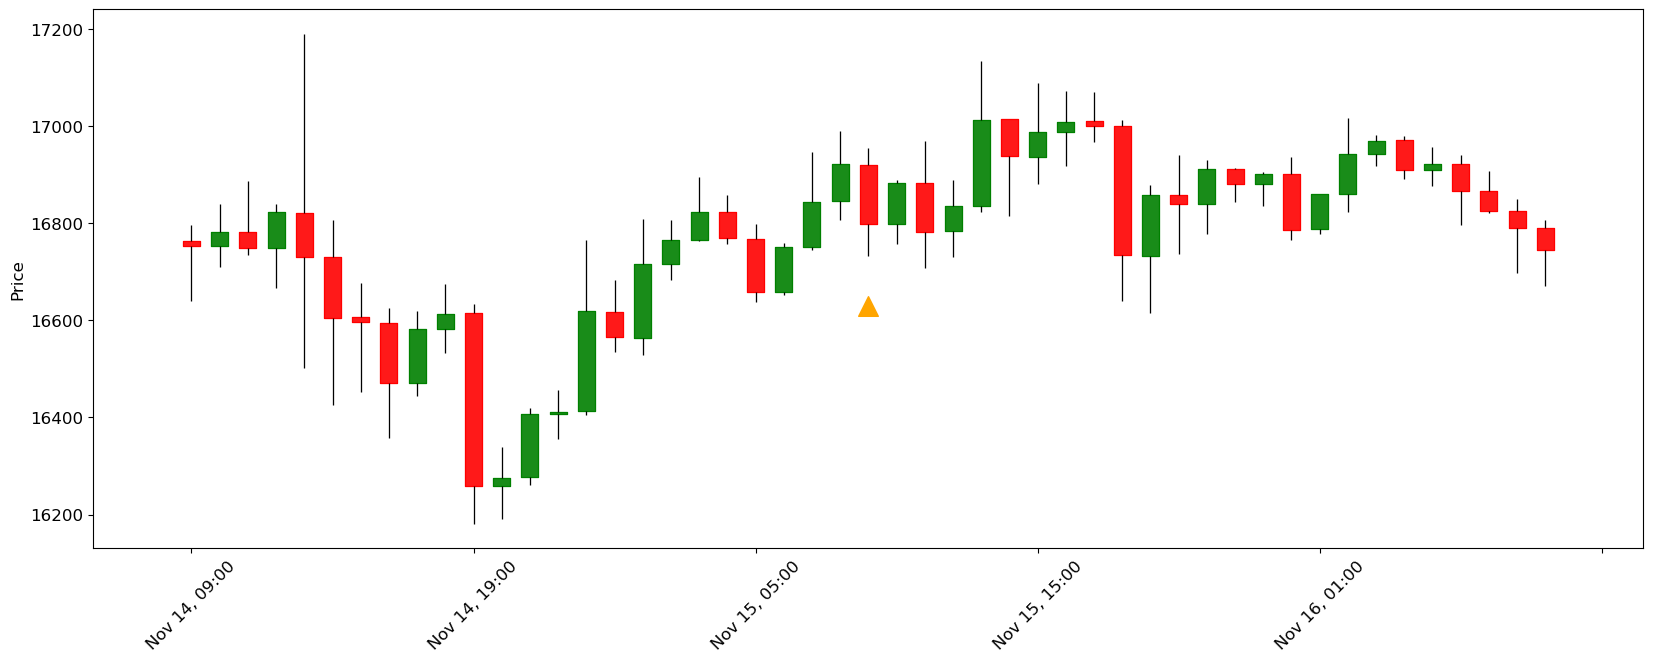

,open,high,low,close,volume,iloc,CDL3INSIDE,CDL3LINESTRIKE,CDLDOJI,CDLHAMMER,...,CDLBELTHOLD,CDLMARUBOZU,CDLENGULFING,CDLMORNINGSTAR,CDLEVENINGSTAR,CDLMORNINGDOJISTAR,CDLHANGINGMAN,CDLSHOOTINGSTAR,CDLEVENINGDOJISTAR,CDLSPINNINGTOP
date,,,,,,,,,,,,,,,,,,,,,
2022-10-29 10:00:00,20955.25,21085.00,20725.00,20773.86,22260.40294,45455,0,0,0,0,...,0,0,0,0,-100,0,0,0,0,0
2022-11-01 00:00:00,20490.74,20505.62,20440.64,20456.57,10863.93121,45517,0,0,0,0,...,0,0,0,0,-100,0,0,0,-100,0
2022-11-07 03:00:00,20987.21,20990.00,20878.00,20913.82,12037.02770,45664,0,0,0,0,...,-100,0,0,0,-100,0,0,0,-100,0
2022-11-15 09:00:00,16920.56,16953.94,16731.58,16797.92,12863.53436,45862,0,0,0,0,...,0,0,0,0,-100,0,0,0,0,0
2022-11-29 17:00:00,16410.67,16427.59,16358.87,16379.72,7310.75506,46206,0,0,0,0,...,0,0,0,0,-100,0,0,0,0,0


In [6]:
figure_data = []

# -- Hammer --
# dt = df.copy().loc[(df["CDLHAMMER"] == 100) & (df["close"] - df["open"] > 0)]
# dt = df.copy().loc[(df["CDLHAMMER"] == 100) & (df["close"] - df["open"] < 0)]
# dt = df.copy().loc[(df["CDLHAMMER"] == 100) & (df["close"] - df["open"] > 0) & (df["open"] <= df["close"].rolling(10).min())]
# dt = df.copy().loc[(df["CDLHAMMER"] == 100) & (df["close"] - df["open"] < 0) & (df["open"] >= df["close"].rolling(10).max())]
# dt = df.copy().loc[(df["CDLINVERTEDHAMMER"] == 100)& (df["close"] - df["open"] < 0)]
# dt = df.copy().loc[(df["CDLINVERTEDHAMMER"] == 100)& (df["close"] - df["open"] > 0)]

# -- Doji --
# dt = df.copy().loc[(df["CDLDOJI"] == 100)]
# dt = df.copy().loc[(df["CDLDOJI"] == 100) & (df["close"].shift(1) - df["open"].shift(1) > 0)]
# dt = df.copy().loc[(df["CDLDOJI"] == 100) & (df["close"].shift(1) - df["open"].shift(1) < 0)]
# dt = df.copy().loc[(df["CDLDOJI"] == 100) & (df["close"].shift(-1) - df["open"].shift(-1) > 0)]
# dt = df.copy().loc[(df["CDLDOJI"] == 100) & (df["close"].shift(-1) - df["open"].shift(-1) < 0)]

# -- 3 Inside --
# dt = df.copy().loc[(df["CDL3INSIDE"] == 100)]
# dt = df.copy().loc[(df["CDL3INSIDE"] == -100)]

# -- 3 Line Strike --
# dt = df.copy().loc[(df["CDL3LINESTRIKE"] == 100)]
# dt = df.copy().loc[(df["CDL3LINESTRIKE"] == -100)]

# -- Belt Hold --
# dt = df.copy().loc[(df["CDLBELTHOLD"] == 100)]
# dt = df.copy().loc[(df["CDLBELTHOLD"] == -100)]

# -- Marubozu --
# dt = df.copy().loc[(df["CDLMARUBOZU"] == 100)]
# dt = df.copy().loc[(df["CDLMARUBOZU"] == -100)]

# -- Engufling --
# dt = df.copy().loc[(df["CDLENGULFING"] == 100)]
# dt = df.copy().loc[(df["CDLENGULFING"] == -100)]

# -- Morning / Evening Star --
# dt = df.copy().loc[(df["CDLMORNINGSTAR"] == 100)]
dt = df.copy().loc[(df["CDLEVENINGSTAR"] == -100)]




shift = 0
for index, row in dt.iterrows():
    index_figure = int(row["iloc"])
    price_detected = df.iloc[index_figure+shift]["close"]
    figure_data.append({
        "index_figure": index_figure,
        "price_when_detected": price_detected,
        "diff_mean_close_1": (df.iloc[index_figure+1+shift:index_figure+2+shift]["close"].mean() - price_detected) / price_detected,
        "diff_mean_close_3": (df.iloc[index_figure+1+shift:index_figure+4+shift]["close"].mean() - price_detected) / price_detected,
        "diff_mean_close_5": (df.iloc[index_figure+1+shift:index_figure+6+shift]["close"].mean() - price_detected) / price_detected,
        "diff_mean_close_10": (df.iloc[index_figure+1+shift:index_figure+11+shift]["close"].mean() - price_detected) / price_detected,
        "diff_mean_close_20": (df.iloc[index_figure+1+shift:index_figure+21+shift]["close"].mean() - price_detected) / price_detected,
        "diff_mean_close_40": (df.iloc[index_figure+1+shift:index_figure+41+shift]["close"].mean() - price_detected) / price_detected,
    })

df_figure = pd.DataFrame(figure_data)
len_figure = len(df_figure)
print("---",len_figure,"Figure detected")
print("Average evolution after 1 periods:",round(df_figure["diff_mean_close_1"].mean()*100,2),"% |", round(100 * len(df_figure.loc[df_figure["diff_mean_close_1"] > 0]) / len_figure,2),"% of data > 0")
print("Average evolution after 3 periods:",round(df_figure["diff_mean_close_3"].mean()*100,2),"% |", round(100 * len(df_figure.loc[df_figure["diff_mean_close_3"] > 0]) / len_figure,2),"% of data > 0")
print("Average evolution after 5 periods:",round(df_figure["diff_mean_close_5"].mean()*100,2),"% |", round(100 * len(df_figure.loc[df_figure["diff_mean_close_5"] > 0]) / len_figure,2),"% of data > 0")
print("Average evolution after 10 periods:",round(df_figure["diff_mean_close_10"].mean()*100,2),"% |", round(100 * len(df_figure.loc[df_figure["diff_mean_close_10"] > 0]) / len_figure,2),"% of data > 0")
print("Average evolution after 20 periods:",round(df_figure["diff_mean_close_20"].mean()*100,2),"% |", round(100 * len(df_figure.loc[df_figure["diff_mean_close_20"] > 0]) / len_figure,2),"% of data > 0")
print("Average evolution after 40 periods:",round(df_figure["diff_mean_close_40"].mean()*100,2),"% |", round(100 * len(df_figure.loc[df_figure["diff_mean_close_40"] > 0]) / len_figure,2),"% of data > 0")
plot_candle_pattern(df, int(dt.iloc[-2]["iloc"]), hours_multiplier=1, marker_zoom=0.01)
dt.iloc[-5:]

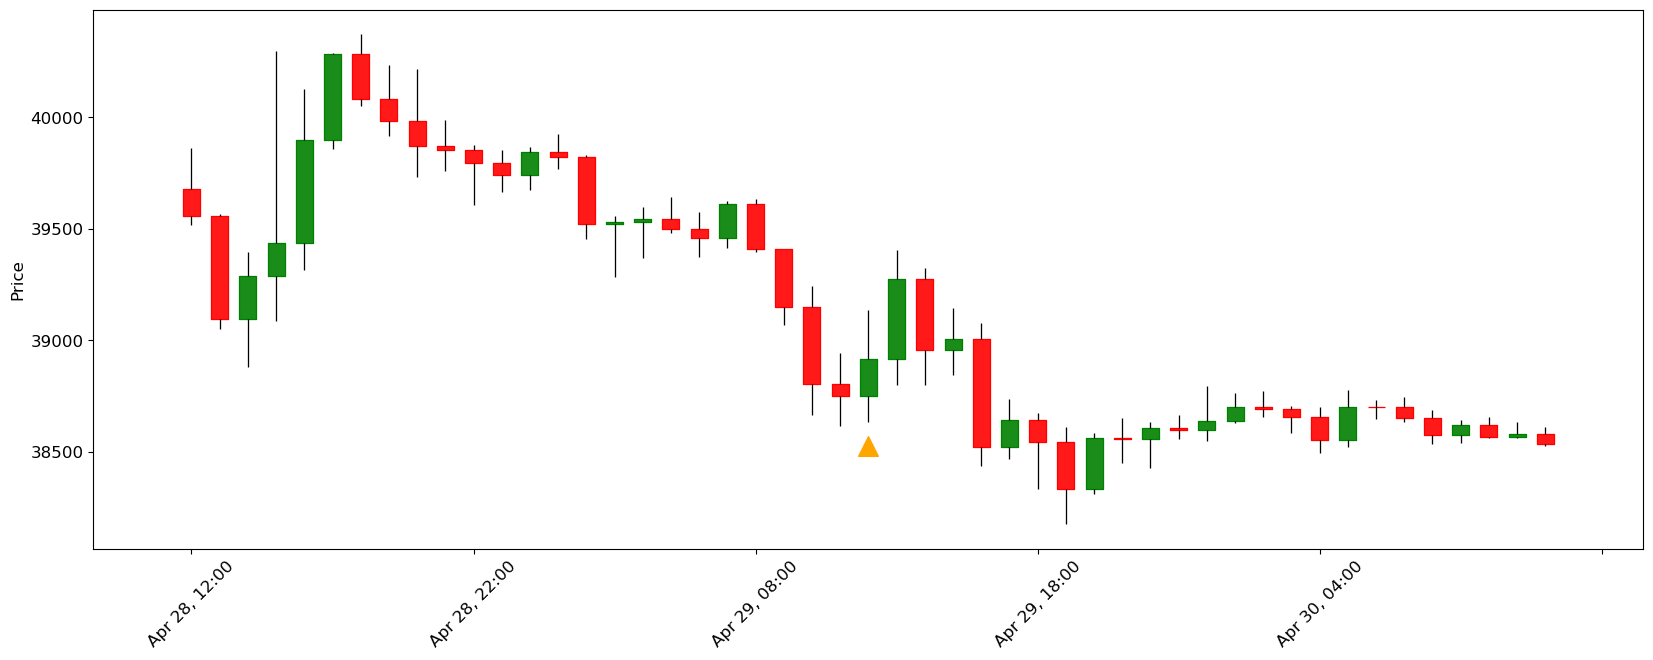

In [7]:
plot_candle_pattern(df, 41065, hours_multiplier=1, marker_zoom=0.01)